# Introduction

## What is this dataset about?

As a recent computer science graduate, and current graduate student I have been hearing about massive lay offs by the tech companies. The motivation of this data analysis report is to explore and make models to predict whether the current lay off can have negative impact to graduate of 2024 and 2025.  

## Features and values:
   **company** : It is a name of the company that had layoff ; Data-Type=String
    
   **total_layoffs**: total number of layoff ; DataType=Integer
    
    
   **impacted_workforce%** : % of worker that were layoff within the company DataType= Float
   
   
   **reported date**: the date that the layoffs were reported; DataType=String
    
   **industry**: The sector of the company; Data Type=String
    
   **headquarter**: location of headquarter; Data Type = String
   
   **sources**: The platforms that reported the layoffs
    
   **status**: What kind of company is it? Private/Public
   
   **addition Note**: More information

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/TechLayOff/tech_layoffs.csv")
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


# Data Wrangling(Pre-Processing of the Data)

## Checking to see if any column name need renaming

In [2]:
pd.DataFrame(df.columns)

,0
0,company
1,total_layoffs
2,impacted_workforce_percentage
3,reported_date
4,industry
5,headquarter_location
6,sources
7,status
8,additional_notes


## Taking Care of any out of context feature : Dropping additional_notes column

In [3]:
df.drop(['additional_notes'],axis=1,inplace=True)
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


## Checking for any NA values

In [4]:
pd.DataFrame(df.isna().sum())

,0
company,0
total_layoffs,0
impacted_workforce_percentage,0
reported_date,0
industry,0
headquarter_location,0
sources,0
status,0


## Checking for any missing(NULL) values

In [5]:
pd.DataFrame(df.isnull().sum())

,0
company,0
total_layoffs,0
impacted_workforce_percentage,0
reported_date,0
industry,0
headquarter_location,0
sources,0
status,0


As it is evidenced, the data is good quality with respect of lacking no missing values within it. 

## Checking DataType of each column

In [6]:
df.dtypes

company                          object
total_layoffs                    object
impacted_workforce_percentage    object
reported_date                    object
industry                         object
headquarter_location             object
sources                          object
status                           object
dtype: object

## Data Type Conversion 

In [7]:

df['total_layoffs'] = pd.to_numeric(df['total_layoffs'], errors='coerce')
# print(df.dtypes)
df.dropna(subset=['total_layoffs'], axis=0, inplace=True)
df['total_layoffs']=df['total_layoffs'].astype(int)




df['impacted_workforce_percentage'] = pd.to_numeric(df['impacted_workforce_percentage'], errors='coerce')



        
      
# df['total_layoffs'].unique()
print(df.dtypes)


company                           object
total_layoffs                      int32
impacted_workforce_percentage    float64
reported_date                     object
industry                          object
headquarter_location              object
sources                           object
status                            object
dtype: object


In [8]:
unique_types = df['company'].apply(type).unique()
print(unique_types)
print(df.dtypes)


[<class 'str'>]
company                           object
total_layoffs                      int32
impacted_workforce_percentage    float64
reported_date                     object
industry                          object
headquarter_location              object
sources                           object
status                            object
dtype: object


**The rest of the columns are already in the desired data type and we don't need to do further type conversion.**

## Data distribution condition for our numerical features:


### Getting insights to unique values in total_layoffs

In [9]:
df['total_layoffs'].unique()

array([   20,    13,    24,    25,    26,    50,    11,   110,    12,
          15,   150,   220,    63,   750,   100,   237,    58,   130,
          35,    60,    68,    84,    90,   120,    30,    32,    56,
          59,    85,   169,    70,    78,   140,   142,    21,    65,
          80,   200,   123,   136,   156,    40,    94,    10,   124,
          55,     7,   125,    16,   250,    45,    47,     5,    54,
         450,   170,    27,   104,    43,   254,   260,    57,   640,
          67,    76,    23,    37,    72,    74,   950,   378,  1100,
         162,   173,    33,    44,   158,   262,    64,  5000,   111,
          88,  1000,   101,   400,    14,  1050,   109,  1095,   113,
         149,   163,   167,   175,   180,    19,   224,   226,  2300,
         310,   370,    73,    75,    82,    97,    38,   700,   270,
       18000,   300,   350,  4100,    95,   588,  1250,   840,   155,
         509,    99,   800, 11000,   225,   500,   760,   550,  1332,
        1280,   138,

### Getting insights to unique values in impacted_workforce_percentage

In [10]:
df['impacted_workforce_percentage'].unique()

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  27.,  29.,  30.,  32.,  33.,  34.,  35.,  40.,  42.,
        46.,  48.,  50.,  60.,  75.,  76., 100.,  nan,   1.,  37.,  39.,
        43.,  70.])

**As it is evidenced in the process of converting impacted workforce % ,we have produced nan value. Before further processing we should get rid of the values**

In [11]:
df.dropna(subset=['impacted_workforce_percentage'],axis=0,inplace=True)

### Visualizing NA values in the dataset

<AxesSubplot:>

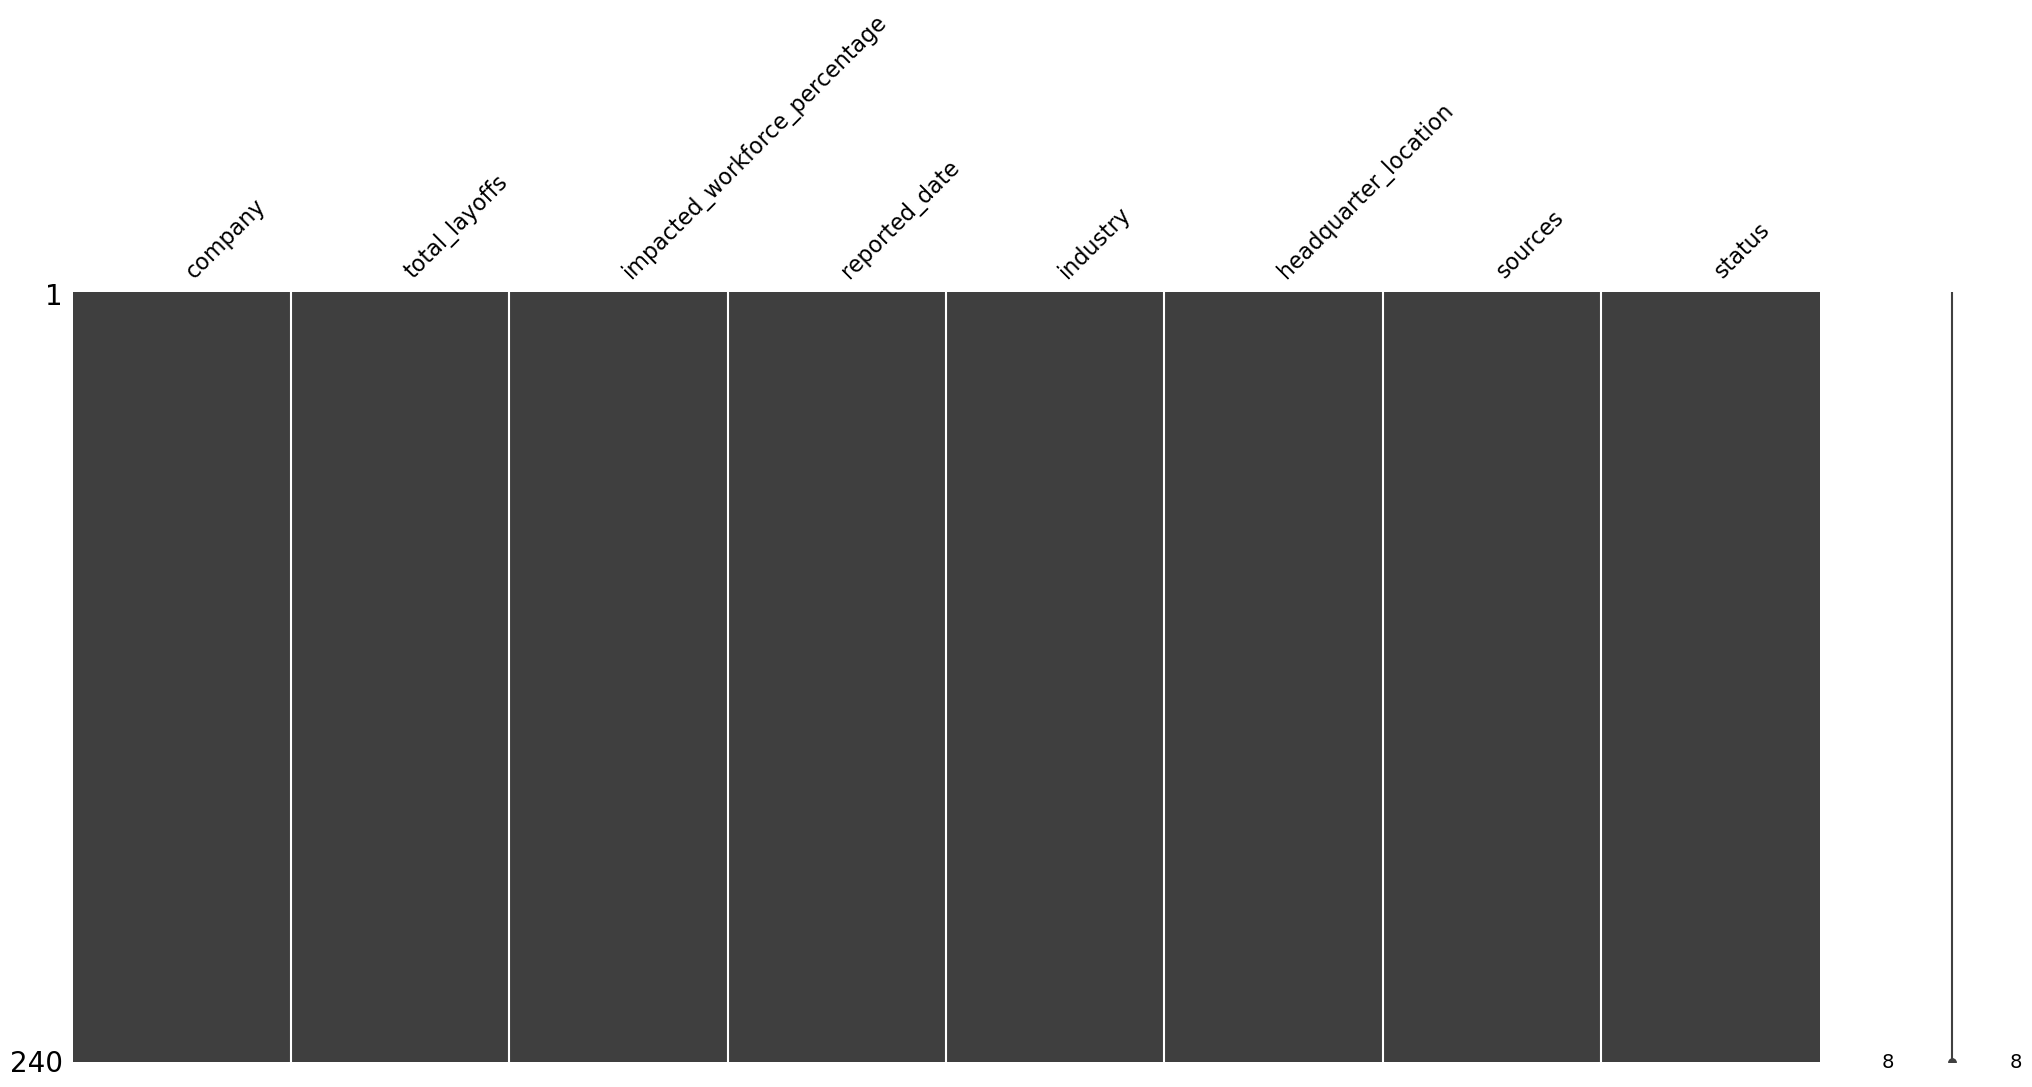

In [12]:
msno.matrix(df)

**From the above matrix, we see that there are no missing/NA values in our dataset. Furthermore, we need to look at the numerical attributes and their statistics**.

In [13]:
pd.DataFrame(df['impacted_workforce_percentage'].describe())

,impacted_workforce_percentage
count,240.000000
mean,19.820833
std,18.258178
min,1.000000
25%,8.000000
50%,15.000000
75%,25.000000
max,100.000000


In [14]:
pd.DataFrame(df['total_layoffs'].describe())

,total_layoffs
count,240.000000
mean,353.370833
std,1441.051197
min,5.000000
25%,43.750000
50%,92.000000
75%,170.750000
max,18000.000000


### Normalizing Lay off total: Z-Score

In [15]:
mean = df['total_layoffs'].mean()
std = df['total_layoffs'].std()
df['total_layoffs']=(df['total_layoffs'] - mean)/ std
pd.DataFrame(df['total_layoffs'].describe())

,total_layoffs
count,2.400000e+02
mean,-5.921189e-17
std,1.000000e+00
min,-2.417477e-01
25%,-2.148576e-01
50%,-1.813751e-01
75%,-1.267275e-01
max,1.224566e+01


### Normalizing  impacted_workforce_percentage: Z-Score

In [16]:
mean = df['impacted_workforce_percentage'].mean()
std = df['impacted_workforce_percentage'].std()
df['impacted_workforce_percentage']=(df['impacted_workforce_percentage'] - mean)/ std
pd.DataFrame(df['impacted_workforce_percentage'].describe())

,impacted_workforce_percentage
count,2.400000e+02
mean,1.739349e-16
std,1.000000e+00
min,-1.030817e+00
25%,-6.474268e-01
50%,-2.640369e-01
75%,2.836628e-01
max,4.391411e+00


**The Z-Score normalization is not an appropriate normalization method for such data distribution. For normal distribution data, it is assumed that most data lies around the mean.The appropriate range for a normally distributed function lies within -3 to 3. This is not the case for both of our numerical features.**

## Normalizing Layoff total : Min-Max scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder



scaler= MinMaxScaler()
column_data=df['total_layoffs'].values.reshape(-1,1) # 2D dimensional array
normalized_data=scaler.fit_transform(column_data) # applying Min-Max scaling
df['total_layoffs']=normalized_data
pd.DataFrame(df['total_layoffs'].describe())


,total_layoffs
count,240.000000
mean,0.019359
std,0.080081
min,0.000000
25%,0.002153
50%,0.004835
75%,0.009211
max,1.000000


In [18]:
scaler2=MinMaxScaler()
column_data=df['impacted_workforce_percentage'].values.reshape(-1,1)
normalized_data=scaler2.fit_transform(column_data) # applying Min-Max scaling
df['impacted_workforce_percentage']=normalized_data
pd.DataFrame(df['impacted_workforce_percentage'].describe())

,impacted_workforce_percentage
count,240.000000
mean,0.190109
std,0.184426
min,0.000000
25%,0.070707
50%,0.141414
75%,0.242424
max,1.000000


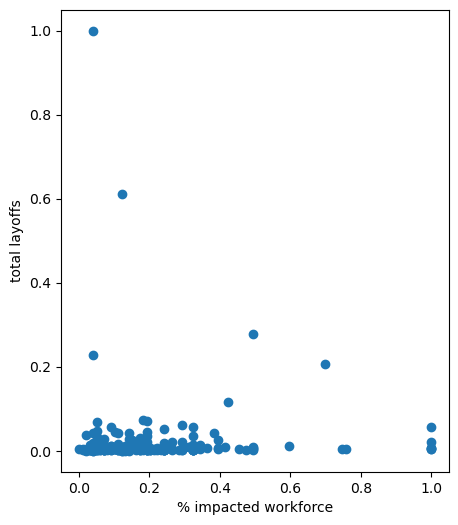

In [19]:
import matplotlib.pyplot as plt
width = 5  # Width in inches
height = 6  # Height in inches
plt.figure(figsize=(width, height))
plt.scatter(df['impacted_workforce_percentage'],df['total_layoffs'])
plt.xlabel("% impacted workforce")
plt.ylabel("total layoffs")
plt.title("")

plt.show()


By Looking at this scatter plot, there are few outliers that need further analysis to understand them. For example,there is a company that have the highest total of layoffs yet the percentage of impacted workforce is the lowest. On the other hand, we have companies with relatively low number of lay offs but yet have higher impacted on their overall workforce. However, most companies have less than 20% of their workforce impacted by the lay offs. We can look the companies from empployee persepctive and put the companies in 3 different group: Not Risky,stable,Risky. Here is the breakdown of the grouping:

    0.1 to 0.15 ------Not Risky for the employees

    0.15 to 0.19 ------ Stable for the employees

    0.19 to 1.0 ----------- Risky for the employees

# Categorizing Companies(Employee-Prespective)

In [20]:
bins=[0,0.15,0.20,1.0]
print(bins)
group_names=["Not-Risky","Slightly-Risky","Risky"]
df['Company-Category']=pd.cut(df["total_layoffs"],bins,labels=group_names,include_lowest=True)
df_copy=df[df['Company-Category']=="Risky"]
df_copy2=df[df['Company-Category']=="Not Risky"]
df_copy3=df[df['Company-Category']=="Stable"]
rows,columns=df_copy.shape
print("Number of companies that are considerred risky: ",rows)


[0, 0.15, 0.2, 1.0]
Number of companies that are considerred risky:  5


# Histogram of company categories

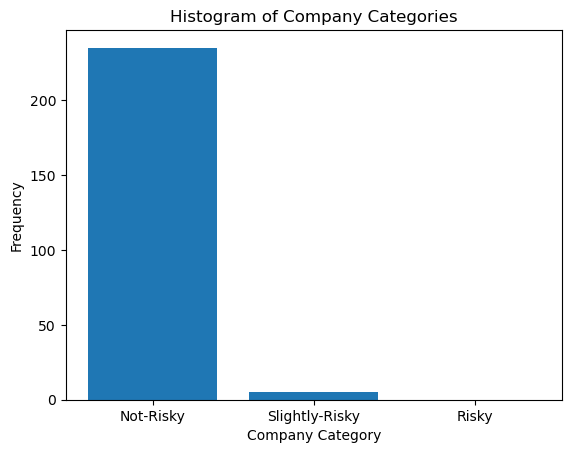

In [21]:
plt.bar(group_names,df['Company-Category'].value_counts())
plt.xlabel("Company Category")
plt.ylabel("Frequency")
plt.title("Histogram of Company Categories")
plt.show()
plt.show()


# Converting Categorical Data to Quantatical Data: get_dummies()

In [24]:

label_encoder = LabelEncoder()
df['status-encoded'] = label_encoder.fit_transform(df['status'])
df['category_encoded'] = label_encoder.fit_transform(df['Company-Category'])
df['name_encoded'] = label_encoder.fit_transform(df['company'])
df['sector_encoded'] = label_encoder.fit_transform(df['industry'])
df['loc_encoded'] = label_encoder.fit_transform(df['headquarter_location'])
df['source_encoded'] = label_encoder.fit_transform(df['sources'])




# new_company_status=pd.get_dummies(df['status'])
# comp_cat=pd.get_dummies(df['Company-Category'])


# df=df.drop('status',axis=1)
# df=df.drop('Company-Category',axis=1)

# df = pd.concat([df, new_company_status,comp_cat], axis=1)
# df

In [25]:
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Company-Category,status-encoded,cat_encoded,category_encoded,name_encoded,sector_encoded,loc_encoded,source_encoded
0,C2FO,0.000834,0.010101,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,Not-Risky,0,0,0,35,57,24,57
2,Amperity,0.000445,0.020202,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,Not-Risky,0,0,0,10,103,58,48
3,Addepar,0.000834,0.020202,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,Not-Risky,0,0,0,3,132,33,44
4,Thirty Madison,0.001056,0.020202,5/13/2022,Health Care,New York,Axios,Private,Not-Risky,0,0,0,205,64,37,7
6,Armis Security,0.001111,0.030303,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,Not-Risky,0,0,0,15,28,50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Latch,0.006113,0.363636,8/2/2022,PropTech,"New York, NY",Latch,Public,Not-Risky,1,0,0,116,94,38,59
459,Sema4,0.041400,0.383838,11/14/2022,"AI, health care","Stamford, CT",MarketWatch,Public,Not-Risky,1,0,0,179,2,61,64
460,Root Insurance,0.025674,0.393939,11/9/2022,InsurTech,Columbus,Columbus Dispatch,Public,Not-Risky,1,0,0,174,73,12,31
461,Coinbase,0.116977,0.424242,1/10/2023,Crypto,San Francisco,CNBC,Public,Not-Risky,1,0,0,50,24,50,18
